In [ ]:
pip install pycountry_convert

In [ ]:
pip install pywaffle

According to the Cambridge Dictionary [1] "having your head in the clouds" means to not know the facts of a situation.
Let's get our heads out of the clouds by learning some facts about the current situation of cloud computing with the help of the 2021 Kaggle survey data.

**Key Findings:**
- Around **41 % of professionals on Kaggle** use cloud computing platforms on a regular basis
- Globally, the **three most popular cloud computing platforms are AWS, GCP, and Azure**
- **Alibaba Cloud and Tencent Cloud dominate the Chinese market**
- The cloud usage is comparatively **low in Europe and Africa**
- On average across all countries, Kagglers using cloud platforms on a regular basis **earn 1.7 times** more than those who don't
- Aside from the big three, **students** are also interested in becoming familiar with **IBM Cloud / Red Hat and Oracle Cloud**

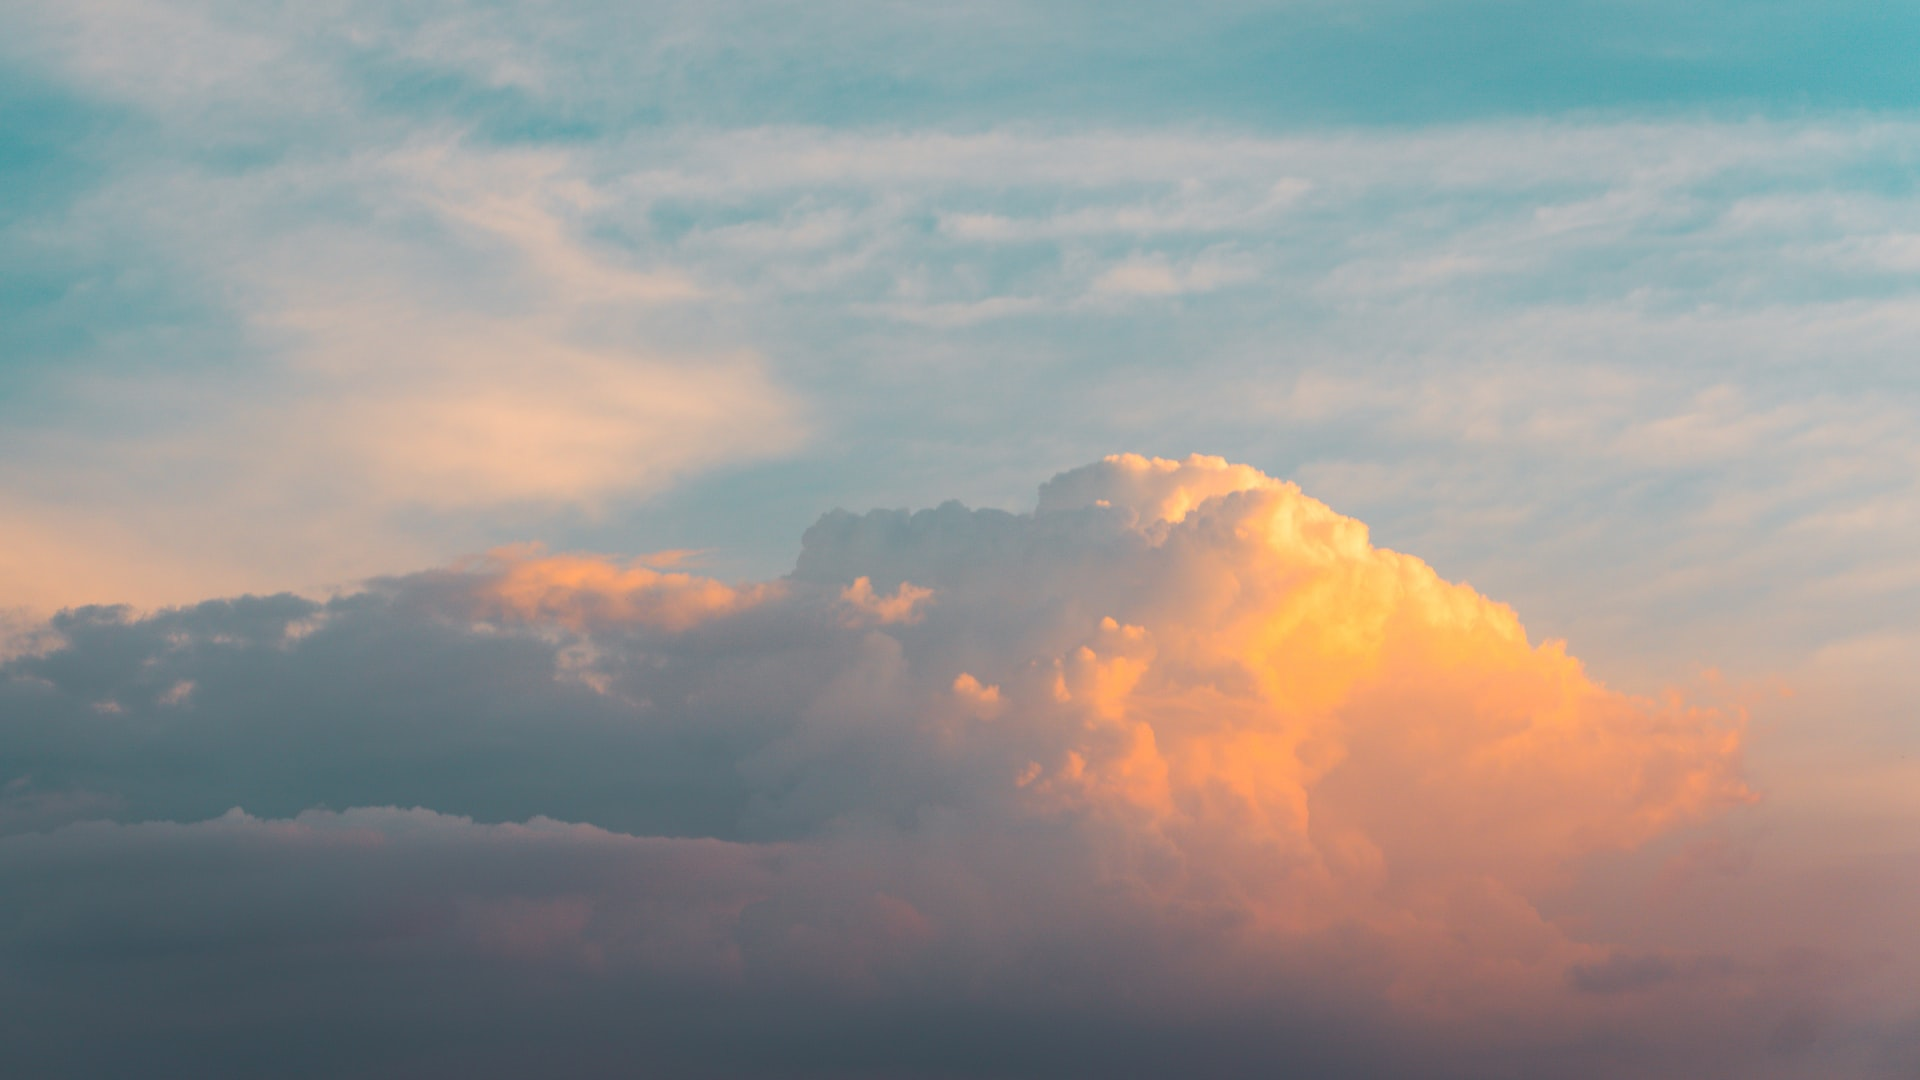

Photo by <a href="https://unsplash.com/@yeahatnet?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Peiheng Yang</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

# Data Overview

For the following analysis, **we will mainly consider "professionals", meaning that we exclude students and currently unemployed**. The reason for this is that we want to evaluate the current cloud computing landscape in the industry. Also, Kaggle has used an alternatve set of questions for students regarding cloud computing, which we can later use to evaluate future trends:

> For questions about cloud computing products, students and respondents that have never spent money in the cloud were given an alternate set of questions that asked them "what products they would like to become familiar with" instead of asking them "which products they use most often". [...] - see [kaggle_survey_2021_methodology.pdf](https://www.kaggle.com/c/kaggle-survey-2021/data)

This reduces the amount of considered respondents from about 25,973 to 17,183.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import pi
from scipy.interpolate import interp1d

import pycountry_convert as pc # Get continent from country name

import warnings # Supress warnings
warnings.filterwarnings("ignore")

### Visualizations ###
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 14})

# seaborn
import seaborn as sns

# plotly
import plotly.graph_objects as go
import plotly.express as px

# pywaffle
from pywaffle import Waffle

# Load 2021 Kaggle survey
responses = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv", low_memory = False)

# Remove first row
responses = responses[1:].reset_index(drop=True)

# Set Color Palettes for the notebook
main_color = "#87bec7"
contrast_color = "#516A71"
contrast_color2 = "#9BA9AC"
highlight_color = "#E79972"
highlight_color2 = "#FDCC75"

custom_palette = ["#516A71","#5FA8B4","#9BA9AC","#E79972","#FDCC75"]

custom_cmap = LinearSegmentedColormap.from_list("", [main_color,  contrast_color])
plt.cm.register_cmap("custom_cmap", custom_cmap)

def get_custom_palette(n_colors):
    return sns.color_palette("custom_cmap", n_colors=n_colors)

In [ ]:
def get_category(row):
    for c in row:
        if c == c:
            return c
            break
    return 'None'

def concat_answers(new_col_name, cols):
    responses[new_col_name] = responses[cols].apply(get_category, axis=1)

    responses[new_col_name] = np.where((responses[cols].notna().sum(axis=1) > 1), 
                                       'Multiple', 
                                       responses[new_col_name])
    return responses   

responses = concat_answers('Hosted Notebook Products', 
                           responses.columns[responses.columns.str.startswith('Q10') 
                                             & (responses.columns != 'Q10_Part_16')])
responses = concat_answers('Cloud Computing Platform', 
                           responses.columns[responses.columns.str.startswith('Q27') 
                                             & (responses.columns != 'Q27_A_Part_11')])

responses = concat_answers('Specialized Hardware', 
                           responses.columns[responses.columns.str.startswith('Q12') 
                                             & (responses.columns != 'Q12_Part_5')])

responses = concat_answers('Cloud Computing Products', 
                           responses.columns[responses.columns.str.startswith('Q29') 
                                             & (responses.columns != 'Q29_A_Part_4')])

responses = concat_answers('Data Storage Products', 
                           responses.columns[responses.columns.str.startswith('Q30') 
                                             & (responses.columns != 'Q30_A_Part_7')])

In [ ]:
cloud_cols = ['Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER', 
              'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_OTHER',
             'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11', 'Q27_B_OTHER', 
             'Q30_A_Part_1', 'Q30_A_Part_2', 'Q30_A_Part_3', 'Q30_A_Part_4', 'Q30_A_Part_5', 'Q30_A_Part_6', 'Q30_A_Part_7', 'Q30_A_OTHER',]

cloud_df = responses[cloud_cols].notna()
cloud_df.columns = ['Platform: Amazon Web Services (AWS)', 'Platform: Microsoft Azure', 'Platform: Google Cloud Platform (GCP)', 'Platform: IBM Cloud / Red Hat', 'Platform: Oracle Cloud', 'Platform: SAP Cloud', 'Platform: Salesforce Cloud', 'Platform: VMware Cloud', 'Platform: Alibaba Cloud', 'Platform: Tencent Cloud', 'Platform: None', 'Platform: Other', 
                    'Products: Amazon Elastic Compute Cloud (EC2)', 'Products: Microsoft Azure Virtual Machines', 'Products: Google Cloud Compute Engine', 'Products: None', 'Products: Other',
                    'Platform 2y: Amazon Web Services (AWS)', 'Platform 2y: Microsoft Azure', 'Platform 2y: Google Cloud Platform (GCP)', 'Platform 2y: IBM Cloud / Red Hat', 'Platform 2y: Oracle Cloud', 'Platform 2y: SAP Cloud', 'Platform 2y: Salesforce Cloud', 'Platform 2y: VMware Cloud', 'Platform 2y: Alibaba Cloud', 'Platform 2y: Tencent Cloud', 'Platform 2y: None', 'Platform 2y: Other', 
                   'Data Storage Products: Microsoft Azure Data Lake Storage ', 'Data Storage Products: Microsoft Azure Disk Storage ', 'Data Storage Products: Amazon Simple Storage Service (S3)', 'Data Storage Products: Amazon Elastic File System (EFS)', 'Data Storage Products: Google Cloud Storage (GCS)', 'Data Storage Products: Google Cloud Filestore ', 'Data Storage Products: None', 'Data Storage Products: Other',]

cloud_df['num_platforms'] = cloud_df[cloud_df.columns[cloud_df.columns.str.startswith('Platform: ') & ~cloud_df.columns.str.contains('Platform: None')]].sum(axis=1)#.value_counts().to_frame().reset_index(drop=False)

cloud_df = pd.concat([cloud_df, pd.get_dummies(responses[['Q28']], prefix='Experience')], axis=1)

#cloud_df['Age']  = responses['Q1']
#cloud_df['Gender']  = responses['Q2']
cloud_df['Country']  = responses['Q3']

country_dict = {'Iran, Islamic Republic of...' : 'Iran', 
                'Other' : 'Kazakhstan',  # Dummy, will be replaced in later step
                'I do not wish to disclose my location' : 'Kazakhstan', # Dummy, will be replaced in later step
               'Hong Kong (S.A.R.)' : 'Hong Kong'}
cloud_df['Country_code'] = cloud_df['Country'].replace(country_dict).apply(lambda x: pc.country_name_to_country_alpha2(x, cn_name_format="default"))
cloud_df['Continent'] = cloud_df['Country_code'].apply(lambda x: pc.country_alpha2_to_continent_code(x))
cloud_df['Continent']= np.where(((cloud_df.Country == 'Other') | (cloud_df.Country == 'I do not wish to disclose my location')), np.nan, cloud_df['Continent'])


#cloud_df['Education']  = responses['Q4']
cloud_df['Role']  = responses['Q5']
cloud_df['Computing Platform']  = responses['Q11']
cloud_df['Industry']  = responses['Q20']
cloud_df['Company Size']  = responses['Q21']

cloud_df['Activity_Analyze'] = responses['Q24_Part_1'].notna()
cloud_df['Activity_Infrastructure'] = responses['Q24_Part_2'].notna()
cloud_df['Activity_Prototypes'] = responses['Q24_Part_3'].notna()
cloud_df['Activity_ML_services'] = responses['Q24_Part_4'].notna()
cloud_df['Activity_Experiments'] = responses['Q24_Part_5'].notna()
cloud_df['Activity_Research'] = responses['Q24_Part_6'].notna()

salary_dict = {'$0-999' : 500,
               '1,000-1,999' : 1500,
               '2,000-2,999' : 2500,
               '3,000-3,999' : 3500, 
               '4,000-4,999' : 4500, 
               '5,000-7,499' : 6250,
               '7,500-9,999' : 8750,
               '10,000-14,999' : 12500,
               '15,000-19,999' : 17500,
               '20,000-24,999' : 22500,
               '25,000-29,999' : 27500,
               '30,000-39,999' : 35000,
               '40,000-49,999' : 45000,
               '50,000-59,999' : 55000,
               '60,000-69,999' : 65000, 
               '70,000-79,999' : 75000,
               '80,000-89,999' : 85000,
               '90,000-99,999' : 95000,
               '100,000-124,999' : 112500, 
               '125,000-149,999' : 137500,
               '150,000-199,999' : 175000,
               '200,000-249,999' : 225000,
               '250,000-299,999' : 275000,
               '300,000-499,999' : 400000,
               '$500,000-999,999' : 750000, 
               '>$1,000,000' : 1000000,
       }
cloud_df['Salary']  = responses['Q25'].replace(salary_dict)
cloud_df['Experience']  = responses['Q28']

cloud_df['Cloud-certification programs (direct from AWS, Azure, GCP, or similar)']  = responses['Q40_Part_9'].notna()

cloud_df['Hosted Notebook Products'] = responses['Hosted Notebook Products']
cloud_df['Cloud Computing Platform'] = responses['Cloud Computing Platform']
cloud_df['Specialized Hardware'] = responses['Specialized Hardware']
cloud_df['Cloud Computing Products'] = responses['Cloud Computing Products']
cloud_df['Data Storage Products'] = responses['Data Storage Products']

cloud_students_df = cloud_df[(cloud_df.Role == 'Student')].copy()

cloud_df = cloud_df[(cloud_df.Role != 'Currently not employed') & (cloud_df.Role != 'Student')]


# Code edited from https://www.kaggle.com/kayvanshah/insights-into-kaggle-survey-2021
fig = go.Figure()

fig.add_trace(
    go.Indicator(
        mode = "number",
        value = cloud_df.shape[0],
        title = {"text": f"Number of Professionals on Kaggle <br> out of {responses.shape[0]:,} Respondents"},
        domain = {'x': [0, 0.5], 'y': [0, 1]},
    )
)

fig.update_layout(font_color = main_color, 
                  height=250)

fig.show()

#del responses

# Introduction

The COVID-19 pandemic has necessitated online education and remote work for many children and adults globally. 
This has accelerated the adoption of cloud computing in many organizations. [7]
Even in the 2021 Kaggle Survey data, we can see an **accelerated increase** in the usage of cloud computing platforms in comparison to the previous years 2019 and 2020.
Among the 17,183 professionals of the 2021 survey respondents, roughly **41 % use cloud computing platforms on a regular basis**.

The **drop from the 2018 survey data is assumed to be caused by the rephrasing of the question** from "Which of the following cloud computing services have you used at work or school in the last 5 years?" in 2018 to "Which of the following cloud computing platforms do you use on a regular basis?" starting from 2019. 
Therefore, we can assume that the percentage of Kagglers having some experience with cloud computing platforms is higher than those who use them on a regular basis.

In [ ]:
# Load survey data from 2018
multiple_choice_responses_2018 = pd.read_csv("../input/kaggle-survey-2018/multipleChoiceResponses.csv", low_memory = False)
multiple_choice_responses_2018 = multiple_choice_responses_2018[1:].reset_index(drop=True)

# Load survey data from 2019
multiple_choice_responses_2019 = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv", low_memory = False)
multiple_choice_responses_2019 = multiple_choice_responses_2019[1:].reset_index(drop=True)

# Load survey data from 2020
multiple_choice_responses_2020 = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", low_memory = False)
multiple_choice_responses_2020 = multiple_choice_responses_2020[1:].reset_index(drop=True)


cols_2018 = ['Q15_Part_1', 'Q15_Part_2', 'Q15_Part_3', 'Q15_Part_4', 'Q15_Part_5', 'Q15_Part_7'] # 'Q15_Part_6': None
multiple_choice_responses_2018['cloud_usage'] = multiple_choice_responses_2018[cols_2018].any(axis=1)

cols_2019 = ['Q29_Part_1', 'Q29_Part_2', 'Q29_Part_3', 'Q29_Part_4', 'Q29_Part_5', 'Q29_Part_6', 'Q29_Part_7',
            'Q29_Part_8', 'Q29_Part_9', 'Q29_Part_10', 'Q29_Part_12'] # 'Q29_Part_11': None
multiple_choice_responses_2019['cloud_usage'] = multiple_choice_responses_2019[cols_2019].any(axis=1)

cols_2020 = ['Q26_A_Part_1', 'Q26_A_Part_2', 'Q26_A_Part_3', 'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6', 'Q26_A_Part_7',
            'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'Q26_A_OTHER'] # 'Q26_A_Part_11': None
multiple_choice_responses_2020['cloud_usage'] = multiple_choice_responses_2020[cols_2020].any(axis=1)

cloud_df['cloud_usage'] = cloud_df[cloud_df.columns[cloud_df.columns.str.startswith('Platform: ') & ~cloud_df.columns.str.contains('Platform: None')]].any(axis=1)

# Visualize
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

width = 0.5 
labels = [2018, 2019, 2020, 2021]
x = np.arange(len(labels))

y = [multiple_choice_responses_2018[(multiple_choice_responses_2018.Q6 != 'Student') & (multiple_choice_responses_2018.Q6 != 'Not employed')]['cloud_usage'].value_counts(normalize=True).loc[True]*100, 
     multiple_choice_responses_2019[(multiple_choice_responses_2019.Q5 != 'Student') & (multiple_choice_responses_2019.Q5 != 'Not employed')]['cloud_usage'].value_counts(normalize=True).loc[True]*100, 
     multiple_choice_responses_2020[(multiple_choice_responses_2020.Q5 != 'Student') & (multiple_choice_responses_2020.Q5 != 'Not employed')]['cloud_usage'].value_counts(normalize=True).loc[True]*100, 
     cloud_df['cloud_usage'].value_counts(normalize=True).loc[True]*100]

rects = ax.bar(x, y, width, color=[main_color, main_color, main_color, highlight_color2])

ax.set_xlabel("")
ax.set_ylim([0, 60])
ax.set_xlim([-0.5, 3.5])

ax.set_ylabel("Percentage [%]")
ax.set_xticks(x)   
ax.set_xticklabels(labels)
ax.add_patch(Rectangle((-0.5, 0), 1, 100, fill=True, alpha=0.2, color='grey', lw=0))

z = np.polyfit(x[1:], y[1:], 2)
p = np.poly1d(z)
x_new = np.linspace(1, 3, 500)
f = interp1d(x[1:], p(x[1:]), kind='quadratic')
y_smooth=f(x_new)
ax.plot (x_new,y_smooth, "--", color=highlight_color, linewidth=3)

plt.suptitle('Percentage of Kagglers with Regular Usage of Cloud Computing Platforms by Year')
plt.tight_layout()
plt.show()

# del multiple_choice_responses_2018, multiple_choice_responses_2019, multiple_choice_responses_2020

Cloud computing is on-demand access to computing resources (such as data storage, computing power, databases, and more) provided by a third party organization via the Internet ("the cloud") instead of owning and maintaining physical data centers and servers.

The three most common models of cloud services are IaaS (Infrastructure-as-a-Service), PaaS (Platform-as-a-Service), and SaaS (Software-as-a-Service). Each type of cloud computing provides different levels of control as shown as below:

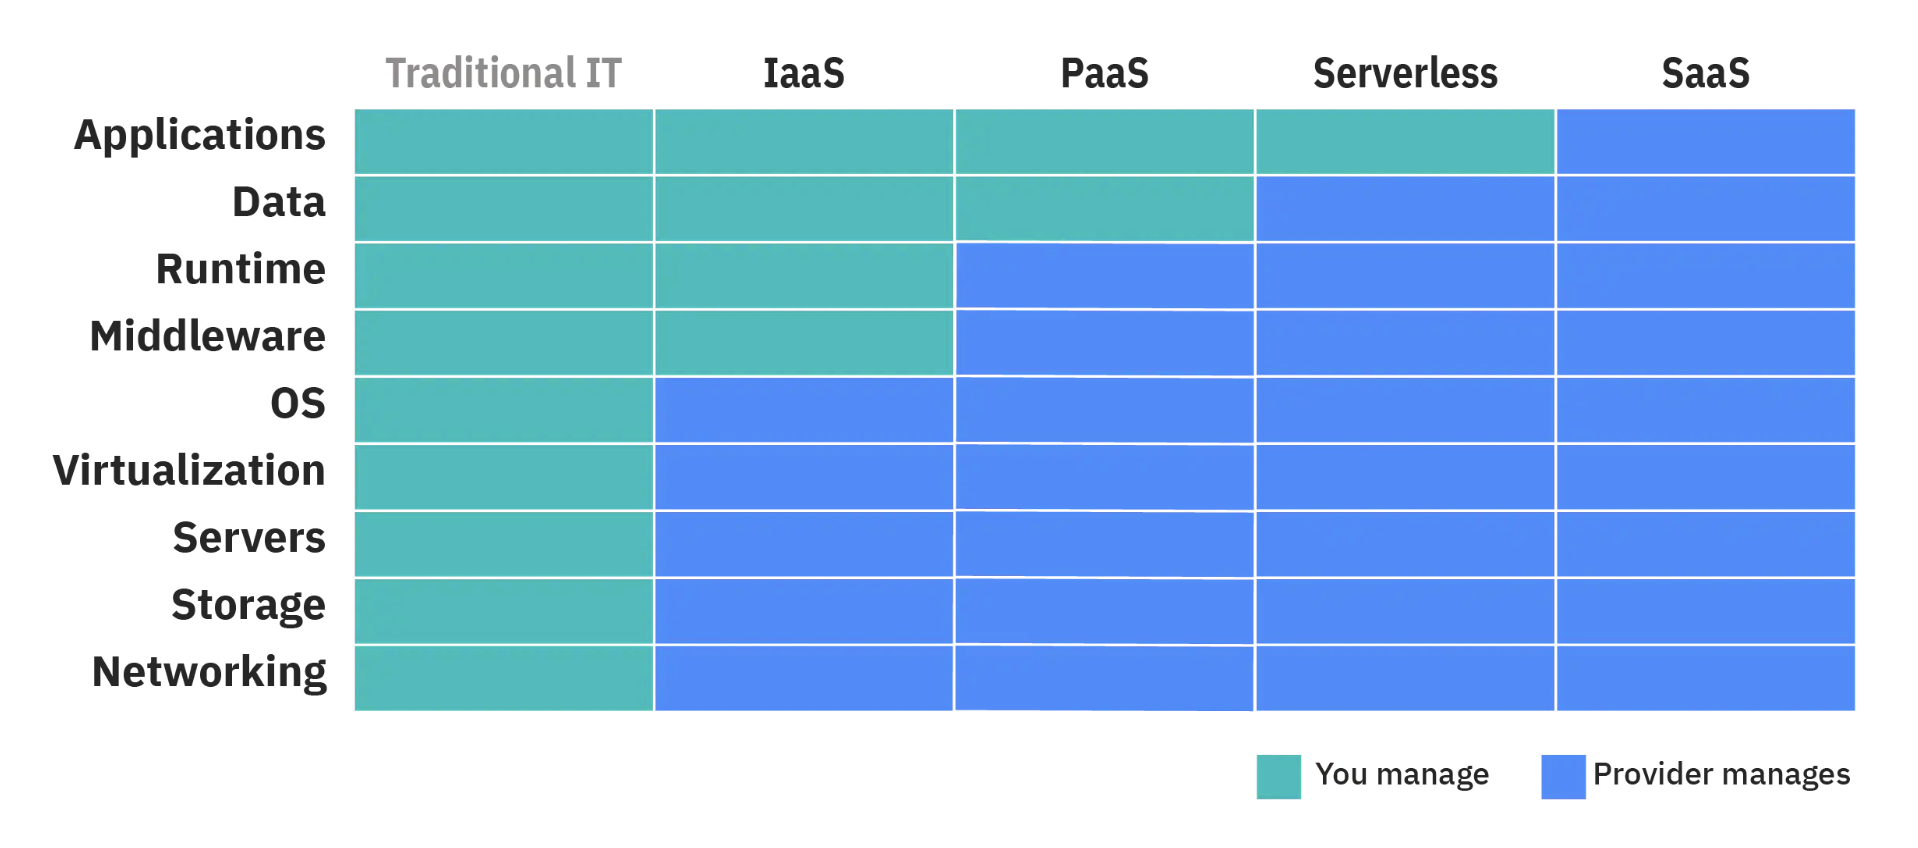
Image Source: [Cloud Computing](https://www.ibm.com/cloud/learn/cloud-computing)

Since you only pay for consumed computing resources instead of maintaining your own IT infrastructure, this can lead to **cost savings**. Cloud computing also provides **elasticity**, which means that you can scale the needed computng resources up or down quickly. Furthermore cloud computing improves **agility**, which means that organizations have access to a broad range of technologies that enable them to start using enterprise applications in minutes.



A SWOT Analysis on Cloud Computing by [2]

| Strengths | Weaknesses | Opportunities | Risks |
| --- | --- | --- | --- |
| **Decreased Costs** | Trust Issues | Disruptive Technology | Competition |
| **Scalability and Flexibility** | **Loss in Control** | Green IT | **Standards** |
| Reduction Potential in Administration | **Lock-in Effect (Migration)** | Complexity | **Regulation** |
| Effective Use | Reliability | Virtualization | **Security** |
| Location Independence | Internet Connection Required [3] | New Markets | Maturity |
|  |  | No upfront investments [3] | |

# Cloud As An Example of the Internet's Fragmentation

In October 2020, The Economist [5] wrote the following paragraph in an article, which we will disect in the following section:
> "The cloud has been seen as an example of the internet’s fragmentation. **Alibaba's and Tencent's cloud arms dominate in China** and are making some inroads elsewhere in Asia. **Europe is so anxious about American firms** that it has launched a state-backed rival, called Gaia-x. Businesses in **poor countries may struggle for access to the cloud**, slowing their development." - The Economist [5]

At a first glance, you can see that there are **three cloud computing platforms, which dominate the global market**: [Amazon Web Services (AWS)](https://aws.amazon.com/de/), [Google Cloud Platform](https://cloud.google.com/gcp/), and [Microsoft Azure](https://azure.microsoft.com/en-us/). 
Among these "big three", **AWS is the most popular** among professionals on Kaggle.

In [ ]:
temp = cloud_df[cloud_df.columns[cloud_df.columns.str.startswith('Platform: ') & ~cloud_df.columns.str.contains('Platform: None')]].sum(axis=0).to_frame().T

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.barplot(data=temp[['Platform: Amazon Web Services (AWS)',
       'Platform: Google Cloud Platform (GCP)', 'Platform: Microsoft Azure',
       'Platform: IBM Cloud / Red Hat', 'Platform: Oracle Cloud',
       'Platform: VMware Cloud', 'Platform: SAP Cloud',
       'Platform: Salesforce Cloud', 'Platform: Alibaba Cloud',
       'Platform: Tencent Cloud', 'Platform: Other']], color=main_color)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

labels = [item.get_text().replace('Platform: ', '') for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.set_title('Popularity of Cloud Computing Platforms')
plt.show()

But if we have a look at the most popular cloud platform by country, we can see that **Alibaba Cloud is the most popular cloud computing platform in China** in contrast to the rest of the world.

In [ ]:
temp = cloud_df.groupby('Country')[cloud_df.columns[cloud_df.columns.str.startswith('Platform: ') & ~cloud_df.columns.str.contains('Platform: None')]].sum()

temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100
    
temp = temp.drop('all', axis=1)

temp = temp.T
   
rows = []

for c in temp.columns:
    abc = temp[c].sort_values(ascending=False)
    rows.append([c, abc.index[0]])

df = pd.DataFrame(rows, columns=["Country", "Most Popular Cloud Platform"])

fig = px.choropleth(locations=df['Country'], 
                    locationmode="country names",
                    color=df["Most Popular Cloud Platform"] ,
                    color_discrete_map={'Platform: Google Cloud Platform (GCP)' : main_color,
                                        'Platform: Amazon Web Services (AWS)': contrast_color,
                                        'Platform: Microsoft Azure': contrast_color2,
                                        'Platform: Alibaba Cloud': highlight_color2}
                   )

fig.update_layout(
    width=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=0.9,
        xanchor="right",
        x=1, 
        title='',
    ),
    title={
        'text': "Most Popular Cloud Computing Platform by Country",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

In fact, if we have a closer look at the popularity of cloud computing platforms in China compared to the rest of the world, we can see that **Alibaba Cloud and Tencent Cloud are more popular than AWS, Microsoft Azure and GCP in China**.

In [ ]:
temp['Row'] = temp[temp.columns[temp.columns != 'China']].mean(axis=1)
temp = temp[['Row', 'China']].T

temp = temp[['Platform: Amazon Web Services (AWS)', 'Platform: Microsoft Azure',
       'Platform: Google Cloud Platform (GCP)', 'Platform: Alibaba Cloud',
       'Platform: Tencent Cloud']]
categories = list([c.replace('Platform: ', '').replace(' ', '\n') for c in temp.columns])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories)
plt.ylim(0, 40)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, main_color, linewidth=3, linestyle='solid', label='Rest of World')
ax.fill(angles, values, main_color, alpha=0.6)

values = temp.iloc[1].values.flatten().tolist()
values += values[:1] 
ax.plot(angles, values, highlight_color2, linewidth=3, linestyle='solid', label='China')
ax.fill(angles, values, highlight_color2, alpha=0.2)

ax.set_title('Comparison of Popularity of Cloud Computing Platforms [%]\n between China and the Rest of the World')
plt.legend(loc='lower left')
plt.show()

While North America is the leading continent in regards to cloud usage, the **usage of cloud computing platforms is comparatively low in Europe and Africa**. 

In [ ]:
temp = cloud_df.groupby('Continent')[['cloud_usage']].sum()
temp['amount'] = cloud_df.Continent.value_counts()

for c in temp.columns:
    temp[c]  =temp[c]/temp['amount']*100

temp = temp.drop(['amount'], axis=1)
temp = temp.sort_values(by='cloud_usage', ascending=False)

g = sns.catplot(data=temp.T, kind="bar", color=main_color)
g.set_axis_labels("", "Percentage [%]").set(ylim=(0, 60))
plt.title('Cloud Usage by Continent')
plt.show()


In [ ]:
cols =  ['Platform: Amazon Web Services (AWS)', 'Platform: Microsoft Azure',
        'Platform: Google Cloud Platform (GCP)',
        'Platform: IBM Cloud / Red Hat', 'Platform: Oracle Cloud',
        'Platform: SAP Cloud', 'Platform: Salesforce Cloud',
        'Platform: VMware Cloud', 'Platform: Alibaba Cloud',
        'Platform: Tencent Cloud', 'Platform: Other']

temp = cloud_df.groupby('Continent')[cols].sum()
temp['amount'] = cloud_df.Continent.value_counts()

for c in temp.columns:
    temp[c]  =temp[c]/temp['amount']*100

temp = temp.drop(['amount'], axis=1)
temp = temp.T


custom_colors = [
    [main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color],
    [main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color, highlight_color2, highlight_color2, main_color],
    [main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color, main_color,main_color, highlight_color2],
    [main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color],
    [main_color, main_color, main_color,highlight_color2, highlight_color2, main_color,main_color, highlight_color2, main_color,main_color, main_color],
    [main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color, main_color,main_color, main_color],
]

f, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

width = 0.6 
labels = [c.replace('Platform: ', '') for c in temp.index.values]
x = np.arange(len(labels))
i=0
j=0
for n, col in enumerate(['NA', 'AS', 'EU', 'SA', 'AF', 'OC']):    
    j = n % 3

    y = temp[col].values
    rects = ax[i, j].bar(x, y, width, color=custom_colors[n])

    ax[i, j].set_xlabel("")
    ax[i, j].set_ylim([0, 32])
    ax[i, j].set_ylabel("Popularity [%]")
    ax[i, j].set_xticks(x)
    ax[i, j].set_title(f'{col} (n={len(cloud_df[cloud_df.Continent == col])})')    
    ax[i, j].set_xticklabels(labels, rotation=90)
    if j == 2:
        i = i+1
plt.suptitle('Popularity of Cloud Computing Platforms by Continent')
plt.tight_layout()
plt.show()

# Data Science Workflow in the Cloud

* Expand computing power
* Easier deployment of data solutions
* Data Storage

In [ ]:
cloud_df['Cloud Computing Platform_num'] = cloud_df['Cloud Computing Platform'].replace({
   ' Amazon Web Services (AWS) ' :0, 
    ' Google Cloud Platform (GCP) ':1, 
    
    ' Microsoft Azure ' : 2,
    'Multiple' : 3, 
    'None' :-1, 
    ' Oracle Cloud ' : -1, 
    ' IBM Cloud / Red Hat ' : -1,
    'Other' :-1, 
    ' Alibaba Cloud ' : -1,
    ' Tencent Cloud ' : -1, 
    ' VMware Cloud ' : -1, 
    ' SAP Cloud ' :  -1,
    ' Salesforce Cloud ': -1 
})

fig = px.parallel_categories(
    cloud_df[((cloud_df['Platform: Amazon Web Services (AWS)']) |
                                       (cloud_df['Platform: Microsoft Azure']) |
                                       (cloud_df['Platform: Google Cloud Platform (GCP)'])) &
                                      (cloud_df.num_platforms == 1)],
    dimensions=[
        'Cloud Computing Platform',
        'Data Storage Products',
        'Specialized Hardware',
        'Cloud Computing Products'
    ],
                            color='Cloud Computing Platform_num', 
    color_continuous_scale= px.colors.sequential.Teal,
)

fig.show()


# Comparison of the Big Three

|  | AWS | Azure | GCP |
| --- | --- | --- | --- |
| **On Market since** [4] | 2004 | 2010 | 2008 |
| **Cloud Computing Products** | Amazon Elastic Compute Cloud (EC2) | Microsoft Azure Virtual Machines | Google Cloud Compute Engine |
| **Data Storage Products** | Amazon Simple Storage Services (S3) | Microsoft Azure Data Lake Storage | Google Cloud Storage (GCS) |
| | Amazon Elastic File System (EFS) | Microsoft Azure Disk Storage | Google Cloud Filestore |



In [ ]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# Amazon
temp = (cloud_df[(cloud_df['Platform: Amazon Web Services (AWS)'] == True)][['Products: Amazon Elastic Compute Cloud (EC2)',                                                                              'Data Storage Products: Amazon Simple Storage Service (S3)',
                                                                             'Data Storage Products: Amazon Elastic File System (EFS)']].sum(axis=0)/len(cloud_df[(cloud_df['Platform: Amazon Web Services (AWS)'] == True)])*100).to_frame()
temp.columns = ['Percentage [%]']
temp.reset_index(drop=False, inplace=True)
sns.barplot(x="index", y='Percentage [%]', data=temp, ax=ax[0], palette=[main_color, contrast_color, contrast_color])
ax[0].set_title('Amazon Web Services (AWS)')

# Google
temp = (cloud_df[(cloud_df['Platform: Google Cloud Platform (GCP)'] == True)][['Products: Google Cloud Compute Engine', 'Data Storage Products: Google Cloud Storage (GCS)', 'Data Storage Products: Google Cloud Filestore ']].sum(axis=0)/len(cloud_df[(cloud_df['Platform: Google Cloud Platform (GCP)'] == True)])*100).to_frame()
temp.columns = ['Percentage [%]']
temp.reset_index(drop=False, inplace=True)
sns.barplot(x="index", y='Percentage [%]', data=temp, ax=ax[1], palette=[main_color, contrast_color, contrast_color])
ax[1].set_title('Google Cloud Platform (GCP)')

# Microsoft
temp = (cloud_df[(cloud_df['Platform: Microsoft Azure'] == True)][['Products: Microsoft Azure Virtual Machines', 'Data Storage Products: Microsoft Azure Data Lake Storage ',
                                                                             'Data Storage Products: Microsoft Azure Disk Storage ']].sum(axis=0)/len(cloud_df[(cloud_df['Platform: Microsoft Azure'] == True)])*100).to_frame()
temp.columns = ['Percentage [%]']
temp.reset_index(drop=False, inplace=True)
sns.barplot(x="index", y='Percentage [%]', data=temp, ax=ax[2], palette=[main_color, contrast_color, contrast_color])
ax[2].set_title('Microsoft Azure')

custom_lines = [Line2D([0], [0], color=main_color, lw=8),
                Line2D([0], [0], color=contrast_color, lw=8)]

for i in range(3):
    ax[i].set_ylim([0, 100])
    ax[i].set_xlabel('')
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(90)
    ax[i].legend(custom_lines, ['Cloud Products', 'Data Storage Products'])
    
    labels = [item.get_text().replace('Data Storage Products: ', '').replace('Products: ', '') for item in ax[i].get_xticklabels()]
    ax[i].set_xticklabels(labels)

plt.tight_layout()
plt.show()

## Developer Experience
If we have a look at Kagglers using all three AWS, Azure and GCP on a regular basis, AWS and GCP seem to deliver better developer experience than Azure.
Similarly Alibaba Cloud seems to offer a better developer experience than Tencent Cloud although a lot of Kagglers seem to enjoy the both similarly.

In [ ]:
"""
temp = cloud_df[(cloud_df['Platform: Amazon Web Services (AWS)'] == True) | 
                  (cloud_df['Platform: Microsoft Azure'] == True) |
                  (cloud_df['Platform: Google Cloud Platform (GCP)'] == True)]
temp['color'] = main_color
temp['Platform'] = temp[platform_cols].idxmax(1).replace({'Platform: Google Cloud Platform (GCP)' : 'Google Cloud Platform (GCP)',
                                                          'Platform: Microsoft Azure' : 'Microsoft Azure', 
                                                          'Platform: Amazon Web Services (AWS)' : 'Amazon Web Services (AWS)'})
temp['Best Developer Experience'] = temp[experience_cols].idxmax(1).replace({'Experience_ Amazon Web Services (AWS) ' : 'Amazon Web Services (AWS)',
                                                                             'Experience_ Google Cloud Platform (GCP) ' : 'Google Cloud Platform (GCP)',
                                                                             'Experience_ Microsoft Azure ' : 'Microsoft Azure',
                                                                             'Experience_They all had a similarly enjoyable developer experience' : 'Similarly enjoyable developer experience',
                                                                             'Experience_None were satisfactory' : 'None were satisfactory'})

# Edited from https://www.kaggle.com/lynnxy/a-deep-dive-into-the-kaggle-survey-from-2017-2021
fig = px.parallel_categories(temp[['Platform', 'Best Developer Experience']], 
                             color_continuous_scale =  [main_color])

fig.update_layout(
    hovermode = 'x',
    title = "Best Developer Experience",
    font = dict(size = 14, color = 'black'),
    titlefont = dict(size =16),
    width=700,
    margin=dict(
        l=150,
        r=250,
        b=100,
        t=100,
        pad=4
    ),)

fig.show()
"""

# Who Uses Cloud Computing?

> **Organizations of every type, size, and industry are using the cloud for a wide variety of use cases**, such as data backup, disaster recovery, email, virtual desktops, software development and testing, big data analytics, and customer-facing web applications. For example, healthcare companies are using the cloud to develop more personalized treatments for patients. Financial services companies are using the cloud to power real-time fraud detection and prevention. And video game makers are using the cloud to deliver online games to millions of players around the world. - [What is cloud computing?](https://aws.amazon.com/what-is-cloud-computing/?nc1=h_ls)


* The regular usage of cloud computing platforms slightly increases with the company size

In [ ]:
temp = cloud_df.groupby('Company Size').cloud_usage.value_counts().to_frame()
temp.columns = ['users']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='Company Size', columns = 'cloud_usage').users
temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c]/ temp['all'] * 100

temp = temp.drop('all', axis=1)
temp.columns = ['Not Using Cloud', 'Using Cloud']

temp = temp .reindex(['0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '10,000 or more employees', ])
labels = temp.index
using = temp['Using Cloud']
not_using = temp['Not Using Cloud']
width = 0.5       # the width of the bars: can also be len(x) sequence

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.bar(labels, using, width, label='Using Cloud', color=highlight_color2)
ax.bar(labels, not_using, width, bottom=using,label='Not Using Cloud', color=main_color)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_ylabel('Percentage [%]')
ax.legend()
ax.set_title('Usage of Cloud Computing by Company Size')


x = np.arange(len(using))
y = using
#ax.scatter(x, using, marker='x', color=highlight_color2, s=10)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"--", color=highlight_color, linewidth=3)

plt.show()

## Cloud Usage by Industry
* The industries with the highest cloud computing platform among Kagglers are 'Computers/Technology', 'Academics/Education', 'Accounting/Finance'
* The industry 'Computers/Technology' is the only industry where more Kagglers use cloud computing platforms than not

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.countplot(data=cloud_df, x='Industry', palette=[contrast_color, main_color], hue='cloud_usage')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

## Popularity by Industry
* AWS is most popular in the industries Computers/Technology and Accounting/Finance
* GCP is most popular in academia

In [ ]:
temp = cloud_df[cloud_df.Industry.isin(['Computers/Technology', 'Academics/Education', 'Accounting/Finance'])].groupby('Industry')[['Platform: Amazon Web Services (AWS)', 'Platform: Microsoft Azure', 'Platform: Google Cloud Platform (GCP)']].sum()
temp['all'] = temp.sum(axis=1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all']
    
temp.drop('all', axis=1)
temp = temp.reset_index(drop=False)

labels = temp['Industry'].values
y1 = temp['Platform: Amazon Web Services (AWS)'].values
y2 = temp['Platform: Microsoft Azure'].values
y3 = temp['Platform: Google Cloud Platform (GCP)'].values

width = 0.2  

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))

rects1 = ax.bar(x -width, y1, width, label='AWS', color=main_color)
rects2 = ax.bar(x, y2, width, label='Azure', color=contrast_color)
rects2 = ax.bar(x + width, y3, width, label='GCP', color=contrast_color2)

plt.xlabel("Industry")
plt.ylabel("Percentage [%]")
plt.title("Popularity of Top 3 Cloud Computing Platforms by Industry")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.show()

> For questions about cloud computing products, students [...] were given an alternate set of questions that asked them **"what products they would like to become familiar with" instead of asking them "which products they use most often"**. [...] 

* In contrast to the industry where AWS is ahead of GCP in popularity, both cloud computing platforms seem to be similarly popular among students. Might this be related to the fact that GCP is the most popular cloud computing platform in academia?
* In contrast to the industry, students are also more interested in other platforms than the big three AWS, GCP and Azure: IBM Cloud / Red Hat and Oracle Cloud.


In [ ]:
temp_students = cloud_students_df[cloud_students_df.columns[cloud_students_df.columns.str.startswith('Platform 2y: ') & ~cloud_students_df.columns.str.contains('Platform 2y: None')]].sum(axis=0).to_frame().T
temp = cloud_df[cloud_df.columns[cloud_df.columns.str.startswith('Platform: ') & ~cloud_df.columns.str.contains('Platform: None')]].sum(axis=0).to_frame().T

# create data
labels = temp.columns.values
y1 = temp.values[0]
y2 = temp_students.values[0]

width = 0.2  # the width of the bars

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))  # the label locations

rects1 = ax.bar(x -width, y1, width, label='Professionals', color=[main_color, 'lightgrey', main_color, main_color, main_color, 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey'])
rects2 = ax.bar(x, y2, width, label='Students', color=[highlight_color2, 'grey', highlight_color2, highlight_color2, highlight_color2, 'grey', 'grey', 'grey', 'grey', 'grey', 'grey'])



plt.title("Comparison of Popularity of Cloud Computing Platforms between Students and Professionals")
plt.xlabel("Cloud Computing Platforms")
plt.ylabel("Count")
ax.set_xticks(x)
labels = [item.replace('Platform: ', '') for item in labels]
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.show()

For the next section, we will look at the five most common roles Kagglers have: 'Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist', and 'Machine Learning Engineer'.

The 'Data Scientist' role is the only role with more Kagglers using cloud computing products on a regular basis (52%) than those who don't (48%).

In [ ]:
most_common_roles = ['Data Scientist', 'Software Engineer', 'Data Analyst', 'Research Scientist', 'Machine Learning Engineer']


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 7))
# Prepare temporary dataframe for visualization
temp = cloud_df[cloud_df.Role.isin(most_common_roles)].groupby('Role').cloud_usage.value_counts(normalize=True).to_frame() * 100
temp.columns = ['percentage']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='Role', columns = 'cloud_usage')['percentage']
temp = temp.sort_values(by=True, ascending=True)
temp.insert(0, '', 100 - temp[0])

# Plot
temp.plot.barh(stacked=True, color=['white', main_color, highlight_color2], edgecolor='none', legend=True, ax=ax)
ax.legend(['Cloud Usage', 'No', 'Yes'], loc='upper right')
ax.axvline(100, linestyle='--', color='black', alpha=.5)
ax.set_zorder(-100)

ax.set_xlim(0, 200)
ax.set_xticklabels(['100', '75', '50','25', '0','25', '50', '75','100'])
ax.set_xlabel('Percentage [%]')
ax.set_ylabel('')

ax.set_title("Cloud Usage by Role")
plt.tight_layout()
plt.show()

# Job

According to a study by Morgan Philips Group [6] in December 2019, the demand for data scientist with cloud platform skills is rising.
> AWS showed up in around 20% of listings with the keyword ‘Data Scientist’, while Azure appeared in around 10%. - Morgan Philips Group [6] 


On average Kagglers that use cloud computing platforms on a regular basis have a **salary that is 1.7 times** the amount of Kagglers not using cloud platforms on a regular basis in their country. That is quite the impressive amount!

Machine Learning Engineers using cloud computing platforms on a regular basis have a median annual salary that is more than $21,000 higher than those who don't. 

For Data Scientists the difference is more than $18,000.

In [ ]:
temp = cloud_df[cloud_df.Role.isin(most_common_roles)].groupby(['Country', 'Role', 'cloud_usage']).Salary.mean().to_frame().reset_index()

temp2 = temp.groupby(['Role', 'cloud_usage']).Salary.median().to_frame().reset_index(drop=False)
temp2 = temp2.pivot(index='Role', columns='cloud_usage').Salary
temp2['diff'] = temp2[False] - temp2[True]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
sns.boxplot(data=temp, x='Role', y='Salary', hue='cloud_usage', 
            fliersize=0, 
            palette=[main_color, highlight_color2],
               order=temp2.sort_values(by='diff').index)
ax.set_ylim([0, 150000])
ax.set_ylabel('Salary [$]')

    
plt.legend(loc='upper left')
plt.title('Salary Comparison According to Cloud Usage')
plt.show()

* Only 11.8 % of Kagglers using Cloud Computing Platforms on a regular basis have begun or completed cloud-certification programs.

In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(cloud_df[cloud_df.cloud_usage == True]['Cloud-certification programs (direct from AWS, Azure, GCP, or similar)'].value_counts(normalize=True)*100),
    labels=['No', 'Yes'],
    figsize=(5, 5),
    colors=(main_color, highlight_color2),
    legend={'loc': 'upper left'},
    title={'label': 'Regular Cloud Computing Platform Users \nwith Cloud Certification'}
)

In [ ]:
# TO DO: Decide whether to use this later
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(cloud_df.cloud_usage.value_counts(normalize=True)*100),
    labels=['No', 'Yes'],
    figsize=(5, 5),
    colors=(main_color, highlight_color2),
    legend={'loc': 'upper left'},
    title={'label': 'Regular Usage of Cloud Computing Platforms \namong all Professionals on Kaggle'}
)


## Cloud Usage by Country

temp = cloud_df.groupby('Country')['cloud_usage'].mean().to_frame().reset_index(drop=False)
fig = px.choropleth(locations=temp['Country'], 
                    locationmode="country names",
                    color=temp["cloud_usage"],
                    color_continuous_scale = 'blues'
                   )

fig.update_layout(
    width=700,
    height=500,
legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="right",
    x=1
)
)
fig.show()

# ## What type of computing platform do you use most often for your data science projects?
# * Most professional Kagglers use a laptop or desktop as their main computing platform
# * Only 11% of professional Kagglers use cloud computing platforms as their main computing platform for data science projects


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.countplot(cloud_df['Computing Platform'], order = cloud_df['Computing Platform'].value_counts().index)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

#temp = cloud_df.groupby('Country')['cloud_usage'].mean().sort_values(ascending=False).to_frame().reset_index(drop=False)

#f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
#sns.barplot(data=temp, x='Country', y='cloud_usage', color='dodgerblue')
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
#plt.show()


# ## Number of Cloud Computing Platforms a Kaggler uses on a Regular Basis
# * Most professional Kagglers use only one cloud computing platform

temp = cloud_df[cloud_df.columns[cloud_df.columns.str.startswith('Platform: ') & ~cloud_df.columns.str.contains('Platform: cloud_df')]].sum(axis=1).value_counts().to_frame().reset_index(drop=False)
temp.columns = ['number_used_cc_products', 'num_users']
temp = temp.sort_values(by = 'number_used_cc_products')
temp = temp[1:]

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.barplot(data=temp, x='number_used_cc_products', y='num_users', palette = 'Blues')
plt.show()


## Cloud Platforms with the best developer experience?

#* Kagglers seem to be satisfied with the cloud platform they are most regularly using
#* Kagglers using multiple cloud platforms seem to find them comparable in developer experience

#> Question 28 (which specific product) was only asked to respondents that selected more than one choice for Question 27-A (which of the following products).

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

corrmat = cloud_df[cloud_df.num_platforms > 1][cloud_df.columns[cloud_df.columns.str.startswith('Platform: ') | cloud_df.columns.str.startswith('Experience_')]].corr()

platform_cols =  ['Platform: Amazon Web Services (AWS)', 
                  'Platform: Microsoft Azure',
                  'Platform: Google Cloud Platform (GCP)',
                  'Platform: IBM Cloud / Red Hat', 
                  'Platform: Oracle Cloud',
                  'Platform: SAP Cloud', 
                  'Platform: Salesforce Cloud',
                  'Platform: VMware Cloud', 
                  'Platform: Alibaba Cloud',
                  'Platform: Tencent Cloud', 
                  'Platform: Other']

experience_cols = [ 'Experience_ Amazon Web Services (AWS) ',
                    'Experience_ Microsoft Azure ',
                    'Experience_ Google Cloud Platform (GCP) ',
                    'Experience_ IBM Cloud / Red Hat ', 
                    'Experience_ Oracle Cloud ', 
                    'Experience_ SAP Cloud ',
                    'Experience_ Salesforce Cloud ',
                    'Experience_ VMware Cloud ', 
                    'Experience_ Alibaba Cloud ',
                    'Experience_ Tencent Cloud ',
                    'Experience_Other',
                    'Experience_They all had a similarly enjoyable developer experience',
                    'Experience_None were satisfactory',]

corrmat = corrmat[platform_cols].T
corrmat = corrmat[experience_cols]
                  
sns.heatmap(corrmat, annot=True, cmap='Blues', vmin=0, vmax=0.5, linewidths=1, fmt='.1f')

#ax.add_patch(Rectangle((0, 12), 3, 3, fill=False, alpha=1, color='k', lw=5))

plt.show()

# ## Correlation between Regularly Used Cloud Platform and Cloud Product
# * As expected, there is a high correlation between the used cloud platform and the used cloud products
# > Question 29-A (which specific AWS/Azure/GCP products) was only asked to respondents that selected the relevant answer choices for Question 27-A (which of the following companies).
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

corrmat = cloud_df[cloud_df.columns[cloud_df.columns.str.startswith('Platform:') | cloud_df.columns.str.startswith('Products:')]].corr()

sns.heatmap(corrmat, annot=True, cmap='Blues', vmin=0, vmax=1,
           mask=np.triu(corrmat), linewidths=1, fmt='.1f')

ax.add_patch(Rectangle((0, 12), 3, 3, fill=False, alpha=1, color='k', lw=5))

plt.show()




#####
selected_continents = ['AS', 'NA', 'EU',]# 'SA', 'AF']
selected_industries = ['Computers/Technology', 
                       'Academics/Education',
                       'Accounting/Finance',
                       'Manufacturing/Fabrication', 
                       'Medical/Pharmaceutical',
                       'Online Service/Internet-based Services',
                       'Government/Public Service',
                       #'Retail/Sales', 
                       #'Energy/Mining',
                       #'Insurance/Risk Assessment'
                      ]

temp = cloud_df[cloud_df.Continent.isin(selected_continents) & cloud_df.Industry.isin(selected_industries)].groupby(['Industry', 'Continent']).agg(Sum=('cloud_usage','sum'), Count= ('cloud_usage','count'))

temp['Sum'] = temp['Sum'] / temp['Count'] * 100
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='Industry', columns = 'Continent')['Sum']
#temp = temp.sort_values(by='NA', ascending=False)
temp = temp.reindex(index = selected_industries)


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.heatmap(temp, cmap=custom_cmap, annot=True, linewidths=1, fmt='.0f')#, vmin=0, vmax=100)

plt.show()

#####
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

platform_cols =  ['Platform: Alibaba Cloud',
                  'Platform: Tencent Cloud']

experience_cols = [ 'Experience_ Alibaba Cloud ',
                    'Experience_ Tencent Cloud ',
                    'Experience_They all had a similarly enjoyable developer experience',
                    'Experience_None were satisfactory',]

temp = cloud_df[(cloud_df['Platform: Alibaba Cloud'] == True) & 
                  (cloud_df['Platform: Tencent Cloud'] == True)][experience_cols]


temp = temp.sum(axis=0).to_frame().reset_index()

sns.barplot(data=temp, y=0,x='index', color=main_color)
ax.set_title('Developer Experience among Kagglers \nthat use Alibaba Cloud and Tencent Cloud on a regular basis')


# References

[1] Cambridge Dictionary. (2021). [Have Your Head in the Clouds](https://dictionary.cambridge.org/de/worterbuch/englisch/have-your-head-in-the-clouds).

[2] Penzel, D., Kryvinska, N., Strauss, C., & Greguš, M. (2015). The Future of Cloud Computing: A SWOT Analysis and Predictions of Development. 2015 3rd International Conference on Future Internet of Things and Cloud, 391-397.

[3] Ghaffari, K., Delgosha, M. S., & Abdolvand, N. (2014). Towards cloud computing: a SWOT analysis on its adoption in SMEs. arXiv preprint arXiv:1405.1932.

[4] Hlova, M. (2020, August 6). [Comparing the Big 3: AWS vs Azure vs GCP](https://www.n-ix.com/comparing-big-3-aws-azure-gcp/)

[5] The Economist (2020, October 22). [Is tech getting more competitive?](https://www.economist.com/leaders/2020/10/22/is-tech-getting-more-competitive)

[6] Morgan Philips Group (2020, May 14). [Cloud computing and the top skills needed by data scientists](https://www.morganphilips.com/en/insights/cloud-computing-and-the-top-skills-needed-by-data-scientists)

[7] Aggarwal, G. (2021, January 15). [How The Pandemic Has Accelerated Cloud Adoption](https://www.forbes.com/sites/forbestechcouncil/2021/01/15/how-the-pandemic-has-accelerated-cloud-adoption/?sh=5e57dbd96621)